# KNN 회귀 알고리즘

* 임의로 생성한 wave 데이터와 boston 데이터를 사용하여 knn 회귀 모델 사용하기

* 회귀의 평가방법 ->  R^2 또는 MSE를 이용한다.

In [1]:
# 데이터를 다루기 전 필요한 라이브러리 호출하기
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mglearn

# 한글깨짐 방지
mpl.rc('font',family='Malgun Gothic')
mpl.rc('axes',unicode_minus = False)

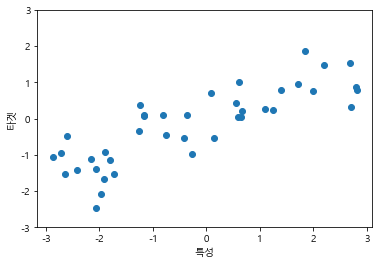

In [8]:
# 전에 만든 wave 데이터 산점도로 확인해보기

# 40개 샘플들 생성
X, y = mglearn.datasets.make_wave(n_samples=40)

# 산점도 그리기
plt.plot(X,y,'o')
plt.ylim(-3,3)  # y축 범위 지정
plt.xlabel('특성') # x축 이름 설정
plt.ylabel('타겟') # y축 이름 설정
plt.show()

In [77]:
# wave 데이터에 knn모델 적용해보기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split


# 데이터 생성
X,y = mglearn.datasets.make_wave(n_samples=40)

# 데이터를 훈련 데이터와 테스트 데이터로 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

# 이웃의 수를 3으로 하여 knn객체 생성
reg = KNeighborsRegressor(n_neighbors=3)

# 훈련 데이터 학습시키기
reg.fit(X_train,y_train)

# 테스트 데이터를 모델에 넣어 예측하기
pred = reg.predict(X_test)

# 모델 평가
print('테스트 예측 : \n',pred)
print('테스트 R^2 : {:.3f}'.format(reg.score(X_test,y_test)))

테스트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 R^2 : 0.834


n_neighbors =  1
0.3519867415115093
n_neighbors =  2
0.6557491875542131
n_neighbors =  3
0.8344172446249604
n_neighbors =  4
0.7704189018456431
n_neighbors =  5
0.7071381144011731


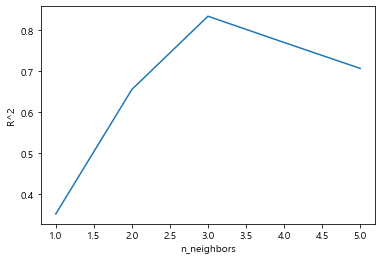

In [45]:
# n_neighbors의 값을 1~5까지 변경시키면서 R^2의 변화를 확인해보기

# n_neighbors를 인수로 가지는 함수 만들기
def change_neighbors(n_neighbors):
    reg = KNeighborsRegressor(n_neighbors= n_neighbors)
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
    return reg.score(X_test,y_test)

# r^2의 값은 score에 저장하기
score = []

# n_neighbors의 값은 1~6까지 반복하기!!
for n in range(1,6):
    score.append(change_neighbors(n))
    print('n_neighbors = ',n)
    print(change_neighbors(n))

    
# R^2의 값들을 그래프로 그려보기
plt.plot(range(1,6),score)
plt.xlabel('n_neighbors')
plt.ylabel('R^2')
plt.show()

#################################

#그래프를 보고 알 수 있는 점은 n_neighbors의 개수가 3일때가 R^2의 값이 가장 높고 개수가 3보다 커질수록 R^2의 값이 
#줄어든다는 사실을 알 수 있습니다.

테스트 사이즈 :  0.2
예측값 :
 [ 0.48363492 -1.32191345  0.49072027 -1.75824074 -0.35898987 -1.02040464
 -0.05396539 -0.65851598]
R^2 : 0.561
테스트 사이즈 :  0.3
예측값 :
 [ 0.48363492 -1.32191345  0.49072027 -1.75824074 -0.36358965 -1.33404238
  0.09219154 -0.65851598  0.09219154 -1.36390047 -1.33404238  0.15023359]
R^2 : 0.411
테스트 사이즈 :  0.4
예측값 :
 [ 0.48363492 -1.32191345  0.49083154 -1.75824074 -0.17566782 -1.33404238
 -0.44388282 -0.65851598 -0.44388282 -1.36390047 -1.33404238  0.07730815
  0.49083154 -0.08872393  0.6597075   0.49083154]
R^2 : 0.527
테스트 사이즈 :  0.5
예측값 :
 [ 0.48363492 -1.63020987  0.49083154 -1.59731859 -0.17566782 -1.80476465
 -0.44388282 -0.65851598 -0.44388282 -1.63020987 -1.80476465  0.07730815
  0.49083154 -0.08872393  0.6597075   0.49083154 -1.63020987 -1.63020987
 -1.80476465  1.0717713 ]
R^2 : 0.603


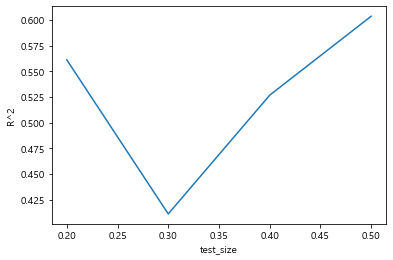

In [44]:
# 테스트 세트의 비율을 조절해서 R^2의 값의 변화를 확인해보기 (n_neighbors는 3으로 고정)

# test데이터를 0.2,0.3,0.4,0.5로 각각 나누어서 R^2 확인해보기
size = [0.2,0.3,0.4,0.5]

# size변경 함수 만들기
def change_test_size(size):
    
    # test데이터를 size만큼의 비율로 나누기
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1,test_size=size)
    
    # 모델 객체 생성후 학습
    reg = KNeighborsRegressor(n_neighbors= 3)
    reg.fit(X_train,y_train)
    
    # 예측
    pred = reg.predict(X_test)
    r_2 = reg.score(X_test,y_test)
    
    return pred,r_2

# 테스트 비율별 R^2값 저장
score1 = []

# test size 반복
for n in size:
    
    # 예측값과 r^2값 저장
    pred,r_2 = change_test_size(n)
    # r^2값 저장
    score1.append(r_2)
    print('테스트 사이즈 : ',n)
    print('예측값 :\n',pred)
    print('R^2 : {:.3f}'.format(r_2))
    
# R^2의 값들을 그래프로 그려보기
plt.plot(size,score1)
plt.xlabel('test_size')
plt.ylabel('R^2')
plt.show()

###############################

# test size를 0.3 비율로 나누었을때 R^2의 값이 가장 낮음을 확인할 수 있다.

* 추가 내용
* n_neighbors 값에 따라 최근접 이웃 회귀로 만들어진 예측을 그래프로 비교하기

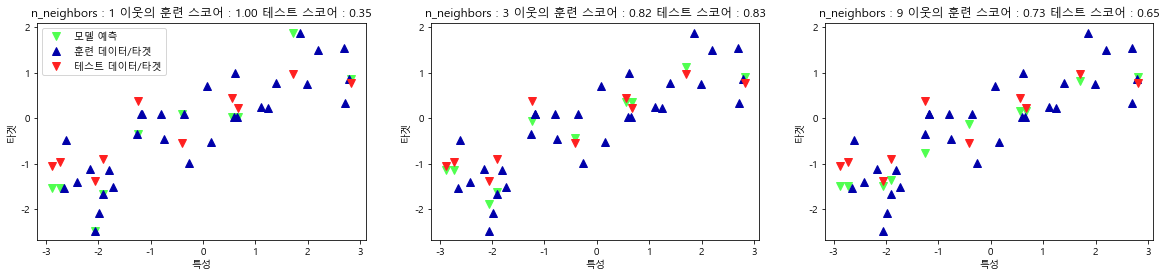

In [63]:
# n_neighbors 값에 따라 최근접 이웃 회귀로 만들어진 예측을 그래프로 비교하기

# 그래프 옵션 설정
fig, axes = plt.subplots(1,3,figsize=(20,4))

# n_neighbors의 값은 1,3,9로 지정하고 각각을 첫번째, 두번째, 세번째 그래프로 지정한다.
for n_neighbors,ax in zip([1,3,9],axes):
    # 모델 생성하고 학습하기
    reg = KNeighborsRegressor(n_neighbors= n_neighbors)
    reg.fit(X_train,y_train)
    
    # 함수 그리기
    # X_test값에 대응하는 예측값들을 그린다. --> 각 점들을 v로 표시하고 색깔은 mglearn에 저장되어 있는 색깔로 표시하고 사이즈를 8로 지정
    ax.plot(X_test,reg.predict(X_test),'v',c = mglearn.cm3(2),markersize=8)
    
    # X_train값에 대응하는 y_train값을 그린다. --> 각 점들을 ^로 표시하고 mglearn에 저장되어 있는 색깔로 표시한다.
    ax.plot(X_train,y_train,'^',c = mglearn.cm3(0),markersize=8)
    
    # X_test값에 대응하는 y_test값을 그린다. --> 각 점들을 v로 표시하고 mglearn에 저장되어 있는 색깔로 표시한다.
    ax.plot(X_test,y_test,'v',c = mglearn.cm3(1),markersize=8)
    
    # 각 그래프의 타이틀을 지정한다.
    ax.set_title('n_neighbors : {} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f}'.format(
        n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    
    # x축, y축 이름 설정하기
    ax.set_xlabel('특성')
    ax.set_ylabel('타겟')
    
    # 범례 설정하기 --> 첫번째 그래프에만 범례 설정하기
    # loc = 'best'는 범례의 최적의 위치를 자동으로 결정해 출력한다.
axes[0].legend(["모델 예측","훈련 데이터/타겟","테스트 데이터/타겟"],loc='best')

########################

# 파란색은 훈련데이터이고 빨간색은 테스트 데이터로 볼 수 있다. 또한, 초록색은 예측값으로 보면 된다.
# 여기서 주의해서 봐야될 것은 예측값과 테스트 데이터이다.
# 테스트 데이터(빨간색)는 실제값이고 초록색인 예측값과 얼마나 차이가 나는지 그래프를 통해 확인해 볼 수 있다.

# KNN 분류기 정리
* 중요한 매개변수는 거리와 이웃의 수이다.
* 이웃의 수가 엄청 작다면 훈련데이터에만 잘 적용되는 과대적합 현상이 일어날 수 잇다.
* 이해하기 쉬운 모델이지만 데이터의 양이 많아지면 예측이 느려지게 된다.
* 많은 특성을 가지면 잘 작동하지 않고, 희소 데이터에도 잘 작동하지 않는다.
* KNN분류기의 단점을 해결할 수 있는 알고리즘으로 선형 모델이 있다.

# 선형 모델

* 입력 특성에 대한 선형 함수를 만들어 예측을 수행한다.
* 선형모델에서 가장 중요한 것은 비용함수 이다.
* 비용함수로는 MSE를 사용하는데 MSE를 최소화 할 수 있는 w와 b값을 찾는 것이 목적이다.
* 최소값을 찾는 방법은 최소제곱법을 이용하여 구할 수 있다.
* 비용함수가 작을수록 모델이 좋다고 판단할 수 있다.
* 비용함수를 작게 만들어주는 w,b의 최소값은 경사하강법을 이용해 구할 수 있게 된다.

In [10]:
# y = ax + b의 선형식에서 a와 b값을 구하는 함수 구현하기!!

def get_ab(x,y):
    # x,y의 평균 구하기
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    # (xi-mean(x))^2의 합 구하기
    sxx = sum([(xi-mean_x)**2 for xi in x])
    
    # (xi-mean(x)) * (yi-mean(y))의 합 구하기
    sxy = sum([(xi-mean_x)*(yi-mean_y) for xi,yi in zip(x,y)])
    
    # a값 구하기
    a = sxy/sxx
    
    # b값 구하기
    b = mean_y - a*mean_x
    
    return a,b

# x,y값 지정
x = [2,4,6,8]
y = [81,93,91,97]

print('기울기 a : ',get_ab(x,y)[0])
print('y절편 b : ',get_ab(x,y)[1])

기울기 a :  2.3
y절편 b :  79.0


In [19]:
# rmse 구하는 함수 구현하기!!
def get_rmse(x,y):
    
    # 선형식의 기울기a와 y절편 b 구하기!!
    a,b = get_ab(x,y)
    
    # 예측값 구하기
    y_hat = a*np.array(x) + b
    
    # rmse 구하기
    rmse = np.sqrt(np.mean((np.array(y)-y_hat)**2))
    
    return y_hat,rmse

y_hat,rmse = get_rmse(x,y)

# 결과값 출력하기
for i in range(len(x)):
    print('실제값 : {:.2f}, 예측값 : {:.2f}'.format(y[i],y_hat[i]))
print('rmse값 : {:.3f} '.format(rmse))

실제값 : 81.00, 예측값 : 83.60
실제값 : 93.00, 예측값 : 88.20
실제값 : 91.00, 예측값 : 92.80
실제값 : 97.00, 예측값 : 97.40
rmse값 : 2.881 


In [34]:
# 위에서 만든 함수들을 하나의 클래스로 구현해보기!!
class rmse:
    def __init__(self,x,y):
        
        # 초기화
        self.x = x
        self.y = y
    
    # a,b 값 구하기
    def get_ab(self,x,y):
        # x,y의 평균 구하기
        mean_x = np.mean(self.x)
        mean_y = np.mean(self.y)
    
        # (xi-mean(x))^2의 합 구하기
        sxx = sum([(xi-mean_x)**2 for xi in x])
    
        # (xi-mean(x)) * (yi-mean(y))의 합 구하기
        sxy = sum([(xi-mean_x)*(yi-mean_y) for xi,yi in zip(x,y)])
    
        # a값 구하기
        a = sxy/sxx
    
        # b값 구하기
        b = mean_y - a*mean_x
    
        return a,b    
        
    # 예측값 구하기
    def predict(self,x,y):
        a,b = get_ab(self.x,self.y)
        y_hat = a*np.array(x) + b
        
        return y_hat
    
    def rmse(self,x,y):
        y_hat = self.predict(self.x,self.y)  # self.predict를 해주어야 앞에서 쓴 predict함수를 인식할 수 있다.
        rmse = np.sqrt(np.mean((np.array(self.y)-y_hat)**2))
        
        return rmse

In [37]:
# 클래스 객체 생성하고 rmse구해보기
frame = rmse(x,y)
print('예측값 :',frame.predict(x,y))
print('실제값 :',frame.y)s
print('rmse : {:.3f}'.format(frame.rmse(x,y)))

예측값 : [83.6 88.2 92.8 97.4]
실제값 : [81, 93, 91, 97]
rmse : 2.881


* 선형회귀 모델 사용

In [39]:
# wave 데이터를 이용해 linear regression 모델 사용하기!!
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 생성
X,y = mglearn.datasets.make_wave(n_samples=60)

# 훈련, 테스트 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

# 모델 생성 및 학습
lr = LinearRegression().fit(X_train,y_train)

# 모델 평가점수 확인하기
print('훈련 데이터 점수 : {:.3f}'.format(lr.score(X_train,y_train)))
print('테스트 데이터 점수 : {:.3f}'.format(lr.score(X_test,y_test)))

# 회귀 모델의 기울기와 편향 구하기
print('lr_coef :',lr.coef_)   # 기울기
print('lr_intercept : ',lr.intercept_) # 절편

# 훈련 데이터 점수와 테스트 데이터 점수를 비교해보았을 때 과대적합은 되지 않았지만 모델 성능이 좋아보이지는 않는다.

훈련 데이터 점수 : 0.670
테스트 데이터 점수 : 0.659
lr_coef : [0.39390555]
lr_intercept :  -0.031804343026759746


In [70]:
# 회귀 모델을 시각화하기 ---> 인용!!

def plot_linear_regression_wave(n_samples):
    X, y = mglearn.datasets.make_wave(n_samples=n_samples)
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # -3부터 3까지 100개의 값 출력 후 열벡터로 변경
    line = np.linspace(-3, 3, 100).reshape(-1, 1)

    lr = LinearRegression().fit(X_train, y_train)
    print("w[0]: %f  b: %f" % (lr.coef_[0], lr.intercept_))

    plt.figure(figsize=(8, 8))  # 그래프 사이즈 조정
    plt.plot(line, lr.predict(line)) # 회귀선 그리기
    plt.plot(X, y, 'o')
    ax = plt.gca()  # 그림이 존재하면 현재 그림에 추가
    ax.spines['left'].set_position('center') # y축의 중간에 위치시킨다.
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center') # x축 중간에 위치
    ax.spines['top'].set_color('none')
    ax.set_ylim(-3, 3)
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.legend(["모델", "훈련 데이터"], loc="best")  # 범례 표시
    ax.grid(True) # 격자선 설정
    ax.set_aspect('equal') # 두 축을 동일하게 설정

w[0]: 0.479545  b: -0.098480
w[0]: 0.404439  b: -0.022568
w[0]: 0.482158  b: 0.041547


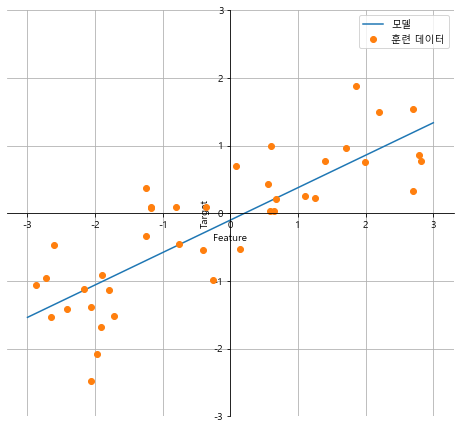

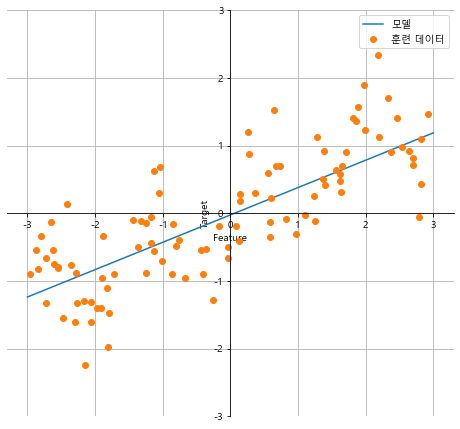

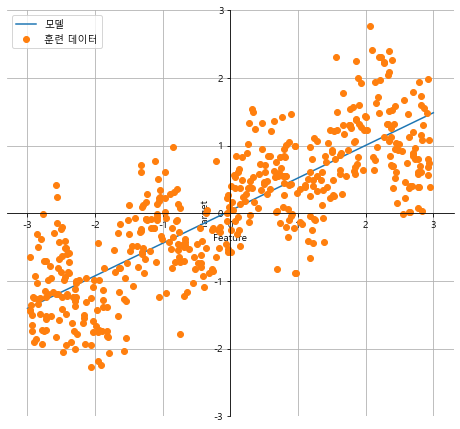

In [75]:
plot_linear_regression_wave(40)
plot_linear_regression_wave(100)
plot_linear_regression_wave(500)

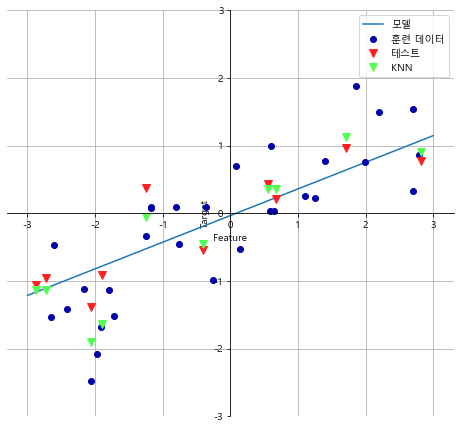

In [81]:
# knn 과 linear regression 모델 비교하기
# 위에서 만든 knn 모델 사용 ---> reg

# 시각화
plt.figure(figsize=(8,8))
plt.plot(line,lr.predict(line)) # 위에서 만든 line 사용
plt.plot(X_train,y_train,'o',c=mglearn.cm2(0)) # 훈련데이터 표시
plt.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8) # 테스트 데이터 표시
plt.plot(X_test,reg.predict(X_test),'v',c=mglearn.cm3(2),markersize=8) # knn 모델 예측값 표시

ax = plt.gca() # 그림이 존재하면 추가로 그림
ax.spines['left'].set_position('center') # y축의 중간에 위치시킨다.
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center') # x축 중간에 위치
ax.spines['top'].set_color('none')
ax.set_ylim(-3, 3) # y축 범위 지정
ax.set_xlabel("Feature")
ax.set_ylabel("Target")
ax.legend(["모델", "훈련 데이터","테스트","KNN"], loc="best")  # 범례 표시
ax.grid(True) # 격자선 설정
ax.set_aspect('equal') # 두 축을 동일하게 설정

* boston 주택 가격 데이터를 가격을 linear regression 모델에 적용하기

In [2]:
# 데이터 불러오고 살펴보기
from sklearn.datasets import load_boston
boston = load_boston()

# 데이터 키 파악
print('boston key : ',boston.keys())
# 데이터 크기
print('데이터 크기 : ',boston.data.shape)
# 특성 이름
print('특성 이름 : ',boston.feature_names)
# 데이터 설명
print(boston.DESCR[10:1000]) # 일부만 출력

# 데이터 프레임으로 변경 후 출력
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

boston key :  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
데이터 크기 :  (506, 13)
특성 이름 :  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighte

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


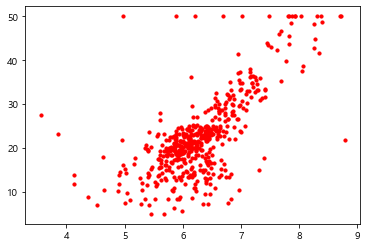

In [3]:
# 방의 개수(RM) 과 주택 가격간의 산점도 그리기
plt.scatter(boston.data[:,5],boston.target,color='r',s=10)

(506,)
(506, 1)
(506, 1)
w[0] : 9.102109 b : -34.670621
R^2 : 0.484


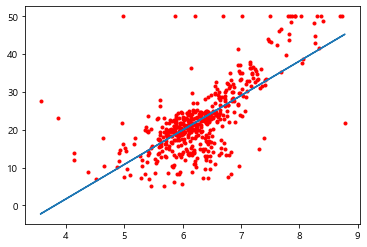

In [23]:
# 방의 개수라는 특성 하나로 선형회귀 모델 적용해보기
from sklearn.linear_model import LinearRegression

# 하나의 특성 선택
X = boston.data[:,5]
# 데이터 크기
print(X.shape)

# 선형모델함수에 인자로 전달하기 위해서는 (n,1)의 형태로 만들어야 한다.

# (n,1)로 바꾸는 첫번째 방법
X_1 = np.atleast_2d(X) # 2차원 배열은 (1,n)으로 바꿔준다.
X_1_t = np.transpose(X_1)  # (1,n)를 (n,1)로 전치시킨다.
print(X_1_t.shape)

# (n,1)로 바꾸는 두번째 방법
X_2 = X.reshape(-1,1)  # reshape 함수를 사용해 (n,1)로 바꿔준다. ---> -1은 전체 행을 의미한다.
print(X_2.shape)

# 타겟 데이터 선택
y = boston.target

#################################################
# 여기서는 train, test를 나누지 않고 전체를 한번에 학습시킨다. (주의!!) ---> 원래는 한번에 학습시키면 안된다.

# 모델 객체 생성
lr = LinearRegression()

# 모델 학습
lr.fit(X_2,y)

# 예측값 출력
y_predict = lr.predict(X_2)

# 회귀식의 계수와 기울기, 모델성능 점수 출력
print('w[0] : %f b : %f' % (lr.coef_[0],lr.intercept_))
print('R^2 : {:.3f}'.format(lr.score(X_2,y)))

# 회귀 모델 시각화 하기
plt.plot(X_2,y,'o',color='r',markersize = 3)
plt.plot(X_2,y_predict)

In [27]:
# 전체 특성을 이용하여 선형회귀 모형 적용하기
# 그 후 knn 모형과 비교하기
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# 훈련, 테스트 나누기
X_train,X_test, y_train, y_test = train_test_split(boston.data,boston.target,random_state = 0)

# 데이터 크기 파악
print('train_size : {}, test_size : {}'.format(X_train.shape,X_test.shape))

# linear regression model 적용
lr = LinearRegression().fit(X_train,y_train)

# knn model 적용
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

# 점수 비교하기
print('선형회귀 훈련 데이터 점수 : {:3f}'.format(lr.score(X_train,y_train)))
print('선형회귀 테스트 데이터 점수 : {:3f}'.format(lr.score(X_test,y_test)))

print('knn 훈련 데이터 점수 : {:3f}'.format(knn.score(X_train,y_train)))
print('knn 테스트 데이터 점수 : {:3f}'.format(knn.score(X_test,y_test)))

###############################

# 두 모델을 비교해 보았을 때 훈련 데이터의 경우 knn알고리즘이 성능이 더 좋아보이지만 새로운 데이터(테스트 데이터)에서는 
# linear regression알고리즘이 더 좋은 성능을 보인다.
# 즉, 우리의 목표는 새로운 데이터에서 좋은 예측을 하는 것이기 때문에 knn보단 linear regression 모델이 더 성능이 좋다고 볼 수 있다.

train_size : (379, 13), test_size : (127, 13)
선형회귀 훈련 데이터 점수 : 0.769770
선형회귀 테스트 데이터 점수 : 0.635464
knn 훈련 데이터 점수 : 0.782123
knn 테스트 데이터 점수 : 0.509785


* boston 확장 주택 가격 데이터를 가격을 linear regression 모델에 적용하기

In [31]:
# 확장 데이터의 경우 원래 있던 특성들에서 특성들의 조합을 새로운 특성으로 추가시켜 특성의 개수를 늘린 데이터이다.

# 데이터 불러오기
X,y = mglearn.datasets.load_extended_boston()
print("X_shape : ",X.shape) # 특성이 13개에서 104개로 늘어난것을 확인할 수 있다.

###########################
# 선형모델과 knn모델을 비교해보자

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

# 선형 회귀모델 생성후 훈련
lr = LinearRegression().fit(X_train,y_train)

# knn 모델 생성후 훈련
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)

# 점수 비교하기
print('선형회귀 훈련 데이터 점수 : {:3f}'.format(lr.score(X_train,y_train)))
print('선형회귀 테스트 데이터 점수 : {:3f}'.format(lr.score(X_test,y_test)))

print('knn 훈련 데이터 점수 : {:3f}'.format(knn.score(X_train,y_train)))
print('knn 테스트 데이터 점수 : {:3f}'.format(knn.score(X_test,y_test)))

###########################

# 앞에서 확장시키지 않은 boston 데이터와 확장된 boston 데이터를 비교해보면,  
# 훈련 데이터의 경우 확장된 데이터의 점수가 훨씬 높았지만, 테스트 데이터의 경우 점수의 차이가 별로 없었습니다.
# 이는 데이터들이 훈련데이터들에만 더 잘 맞는다는 의미이고 즉, 과대적합이 되었음을 알 수 있습니다.

X_shape :  (506, 104)
선형회귀 훈련 데이터 점수 : 0.952052
선형회귀 테스트 데이터 점수 : 0.607472
knn 훈련 데이터 점수 : 0.895442
knn 테스트 데이터 점수 : 0.611134


'\n앞에서 확장시키지 않은 boston 데이터와 확장된 boston 데이터를 비교해보면,  \n훈련 데이터의 경우 확장된 데이터의 점수가 훨씬 높았지만, 테스트 데이터의 경우 점수의 차이가 별로 없었습니다.\n이는 데이터들이 훈련데이터들에만 더 잘 맞는다는 의미이고 즉, 과대적합이 되었음을 알 수 있습니다.\n'

# 릿지 모델

* 선형회귀 모델에서 L2규제를 가한 모델이다.
* 계수의 영향력을 줄이는 모델이다.
* 가중치를 0에 가깝게 줄여 과대적합을 막는다. 
* 특성들이 사라지지는 않는다.

* 릿지 모델에서는 패널티 파라미터로 alpha를 사용한다.
* alpha가 커지면 특성들의 가중치는 작아진다.
* alpha가 작아지면 특성들의 가중치가 커진다.

In [5]:
# 릿지모델의 파라미터 확인해보기
from sklearn.linear_model import Ridge

lr = Ridge()
print('파라미터 :',lr.get_params)

##########################
# ridge모델 파라미터 정리

'''
alpha => 규제를 가하는 파라미터 -->  커질수록 가중치의 비중이 감소한다.
copy_X = True --> X의 복사여부를 물어본다.
fit_intercept --> 모형에 상수항(절편)이 있는지 없는지를 결정하는 파라미터
max_iter --> 계산에 사용할 작업 수
normalize --> 매개변수 무시 여부
random_state --> 시드값 지정
solver --> 계산에 사용할 알고리즘 --> auto, svd, cholesky, lsqr, sparse_cg, sag, saga
tol --> 정밀도
'''

파라미터 : <bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)>


'\nalpha => 규제를 가하는 파라미터 -->  커질수록 가중치의 비중이 감소한다.\ncopy_X = True --> X의 복사여부를 물어본다.\nfit_intercept --> 모형에 상수항(절편)이 있는지 없는지를 결정하는 파라미터\nmax_iter --> 계산에 사용할 작업 수\nnormalize --> 매개변수 무시 여부\nrandom_state --> 시드값 지정\nsolver --> 계산에 사용할 알고리즘 --> auto, svd, cholesky, lsqr, sparse_cg, sag, saga\ntol --> 정밀도\n'

* boston 확장 데이터를 릿지모델에 적용해보기

In [19]:
# ridge모델에 적용하고 선형회귀 모델,knn모델과 비교하기
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# 데이터 불러오기
X,y = mglearn.datasets.load_extended_boston()

# 데이터 나누기
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

# 릿지모델 적용하기
ridge = Ridge().fit(X_train,y_train)
print('릿지 훈련 데이터 점수 : {:.2f}'.format(ridge.score(X_train,y_train)))
print('릿지 테스트 데이터 점수 : {:.2f}'.format(ridge.score(X_test,y_test)))

# 선형회귀 모델 적용하기
lr = LinearRegression().fit(X_train,y_train)
print('선형회귀 훈련 데이터 점수 : {:.2f}'.format(lr.score(X_train,y_train)))
print('선형회귀 테스트 데이터 점수 : {:.2f}'.format(lr.score(X_test,y_test)))

# knn 모델 적용하기
knn = KNeighborsRegressor(n_neighbors=3).fit(X_train,y_train)
print('knn 훈련 데이터 점수 : {:.2f}'.format(knn.score(X_train,y_train)))
print('knn 테스트 데이터 점수 : {:.2f}'.format(knn.score(X_test,y_test)))

릿지 훈련 데이터 점수 : 0.89
릿지 테스트 데이터 점수 : 0.75
선형회귀 훈련 데이터 점수 : 0.95
선형회귀 테스트 데이터 점수 : 0.61
knn 훈련 데이터 점수 : 0.90
knn 테스트 데이터 점수 : 0.61


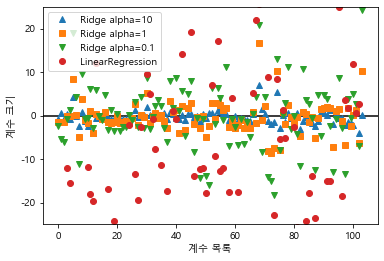

In [20]:
# 규제 파라미터인 alpha값을 바꿔가면서 차이점 확인해보기

# alpha값이 1,10,0.1일때 각각 비교하기
ridge = Ridge(alpha=1.0).fit(X_train,y_train)
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)

# 계수 크기를 alpha값에 대비해 비교해보기
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1]) # 지정한 점을 따라 수평선을 표시
plt.xlim(xlims)  # x범위 지정
plt.ylim(-25, 25) # y범위
plt.legend() #범례표시
plt.show() 

In [23]:
# alpha 크기별 점수 확인하기!!
def ridge(alpha):
    #모델 생성 및 학습
    model = Ridge(alpha=alpha).fit(X_train,y_train)
    
    # 모델 점수 확인
    print('alpha : ',alpha)
    print('훈련 데이터 점수 : {:.3f}'.format(model.score(X_train,y_train)))
    print('테스트 데이터 점수 : {:.3f}'.format(model.score(X_test,y_test)))

# alpha크기 지정
alpha = [10,5,0.5,0.3,0.2,0.1,0.01]

# 함수를 사용해 출력하기
for i in alpha:
    ridge(i)

    
###############################
# alpha 값이 커질수록 과소적합이 되고, alpha값이 작아질수록 과대적합이 되는 경향을 보인다.

alpha :  10
훈련 데이터 점수 : 0.788
테스트 데이터 점수 : 0.636
alpha :  5
훈련 데이터 점수 : 0.822
테스트 데이터 점수 : 0.681
alpha :  0.5
훈련 데이터 점수 : 0.904
테스트 데이터 점수 : 0.768
alpha :  0.3
훈련 데이터 점수 : 0.914
테스트 데이터 점수 : 0.773
alpha :  0.2
훈련 데이터 점수 : 0.920
테스트 데이터 점수 : 0.775
alpha :  0.1
훈련 데이터 점수 : 0.928
테스트 데이터 점수 : 0.772
alpha :  0.01
훈련 데이터 점수 : 0.944
테스트 데이터 점수 : 0.702


# 라쏘 회귀

* L1규제를 사용하여 과대적합을 막을 수 있다.
* 가중치를 0으로 만들어 영향력이 없는 특성들은 제거시킨다.
* alpha의 값에 따라 사용되는 특성의 개수가 달라진다.

In [3]:
# 라쏘 모델 파라미터 확인하기
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.get_params

'''
alpha => 규제를 가하는 파라미터 -->  커질수록 가중치의 비중이 감소한다.
copy_X = True --> X의 복사여부를 물어본다.
fit_intercept --> 모형에 상수항(절편)이 있는지 없는지를 결정하는 파라미터
max_iter --> 계산에 사용할 작업 수
normalize --> 매개변수 무시 여부
precompute=False --> 계산의 속도를 높여준다. --> 희소행렬일때는 true를 사용
random_state --> 시드값 지정
selection --> { 'cyclic', 'random'} --> 'random'으로 설정하면 기본적으로 기능을 순차적으로 반복하지 않고 반복 할 때마다 무작위 계수가 업데이트
tol --> 정밀도
'''

<bound method BaseEstimator.get_params of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)>

In [12]:
# 규제 파라미터인 alpha값의 변화에 따른 모델 적용
# 확장된 boston 데이터 사용
from sklearn.model_selection import train_test_split

# 모델을 학습하기까지의 과정을 하나의 함수로 구현
def change_lasso_alpha(alpha):
    
    # 데이터 불러오기
    X,y = mglearn.datasets.load_extended_boston()

    # 데이터 나누기
    X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 100)
    
    # 모델 생성하고 훈련시키기
    lasso = Lasso(alpha=alpha,max_iter=100000).fit(X_train,y_train)
    
    # 모델 점수와 사용한 특성의 개수 구하기
    print('alpha : ',alpha)
    print('훈련 데이터 점수 : {:.3f}'.format(lasso.score(X_train,y_train)))
    print('테스트 데이터 점수 : {:.3f}'.format(lasso.score(X_test,y_test)))
    print('사용한 특성 개수 : {}개 '.format(np.sum(lasso.coef_ !=0)))  # 계수가 0이면 특성이 사라진다.
    
    return lasso

# alpha값 지정
alpha = [1,0.1,0.01,0.0001]

# 함수를 이용해 출력하기
for i in alpha:
    change_lasso_alpha(i)
    
#####################################

# alpha가 크면 규제가 커져 특성이 사라지는 경우가 생겨 과소적합될 우려가 존재한다.  ---> 복잡도 감소
# alpha가 너무 작으면 규제가 작아져 과대적합될 우려가 존재한다.  ---> 복잡도 증가

# 위에서 만든 코드를 토대로 모델을 선택하다면 alpha=0.01일때의 모델의 성능이 가장 좋다고 볼 수 있다.

alpha :  1
훈련 데이터 점수 : 0.232
테스트 데이터 점수 : 0.201
사용한 특성 개수 : 3개 
alpha :  0.1
훈련 데이터 점수 : 0.743
테스트 데이터 점수 : 0.701
사용한 특성 개수 : 7개 
alpha :  0.01
훈련 데이터 점수 : 0.867
테스트 데이터 점수 : 0.842
사용한 특성 개수 : 31개 
alpha :  0.0001
훈련 데이터 점수 : 0.936
테스트 데이터 점수 : 0.861
사용한 특성 개수 : 97개 


In [16]:
# alpha = 0.01일때 사라진 계수 확인해보기

print('계수 출력 : ',change_lasso_alpha(0.01).coef_)
print('계수가 0이 아닌 위치 출력 : ',np.where(change_lasso_alpha(0.01).coef_ !=0))

alpha :  0.01
훈련 데이터 점수 : 0.867
테스트 데이터 점수 : 0.842
사용한 특성 개수 : 31개 
계수 출력 :  [ -0.          -0.          -0.           0.          -0.
   2.45711544  -0.          -7.47207653   6.5231703    0.
  -0.           0.          -0.          -0.           0.
  -0.           0.          -0.          -0.          -0.
  -0.          -7.88308943  -0.          -0.          -3.44885226
  -0.           0.7312113   -0.           0.          -0.
   1.62840489  -0.           0.          -0.           0.
  -0.          -0.          -0.           0.           0.
   0.          -0.           0.          -5.59346008   0.
   7.26970059  -0.71012025  -0.          -0.           0.
  -0.40173299  -2.83120473   1.59699295  -0.           0.
   0.          -0.           2.41618676  -0.          -2.93730038
  -2.44269402  -0.          -0.          -0.          -0.
  -2.29582288   0.          -0.          25.53950997  -0.
   0.          -5.57968792 -11.54018608  -9.36301544  12.81697102
 -21.24824797   0.          -

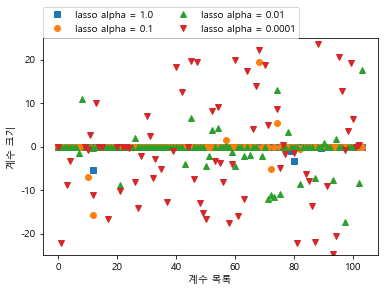

In [35]:
# 라쏘 모형을 시각화 시키기!!

lasso = Lasso(alpha=1,max_iter=100000).fit(X_train,y_train)
lasso01 = Lasso(alpha=0.1,max_iter=100000).fit(X_train,y_train)
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)

plt.plot(lasso.coef_,'s',label='lasso alpha = 1.0')
plt.plot(lasso01.coef_,'o',label='lasso alpha = 0.1')
plt.plot(lasso001.coef_,'^',label='lasso alpha = 0.01')
plt.plot(lasso00001.coef_,'v',label='lasso alpha = 0.0001')

plt.legend(ncol=2,loc=[0,1])  # ncol -> 범례들을 n열로 표현,  loc --> 범례 위치 지정
plt.ylim(-25,25) # y축 지정
plt.xlabel('계수 목록')
plt.ylabel('계수 크기')
plt.show()

# 로지스틱 회귀분석

* 로지스틱 회귀분석은 회귀이지만 분류문제에서 쓰인다.
* 오즈비를 이용해 로지스틱 함수를 유도할 수 있다.
* 시그모이드 함수 최적선을 찾고 시그모이드 함수의 반환 값을 확률로 간주에 분류를 결정한다.
* 시그모이드 함수는 0에서 1사이의 값을 출력하고 그 값이 임계값을 넘어가면 1 넘지 못하면 0으로 분류할 수 있다.

* iris 데이터 사용

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# iris 데이터 생성
iris = datasets.load_iris()

# 데이터 살펴보기
print('iris 데이터 key : ',list(iris.keys()))
print('타깃의 이름 : ',iris.target_names)
print('특성의 이름 : ',iris.feature_names)
print('특성의 데이터 크기 : ',iris.data.shape)
print('타깃의 데이터 크기 : ',iris.target.shape)

iris 데이터 key :  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름 :  ['setosa' 'versicolor' 'virginica']
특성의 이름 :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
특성의 데이터 크기 :  (150, 4)
타깃의 데이터 크기 :  (150,)


In [46]:
# 로지스틱 모델 파라미터 알아보기

logistic = LogisticRegression()
logistic.get_params

'''
C --> alpha 값을 역수취급을 한다. --> 규제의 역할을 하는데, alpha값이 커지면 규제가 작아지고 alpha값이 작아지면 규제가 커진다.
penalty --> [l2,l1,elasticnet,none] 등의 규제가 존재하고 default값은 l2이다.
solver -->[newton-cg, lbfgs, liblinear, sag, saga] 가 있고, defaut값은 lbfgs이다. 
       --> newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’는 l1규제를 사용한다.
       --> liblinear’ and ‘saga’는 l2규제를 사용한다.
'''

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


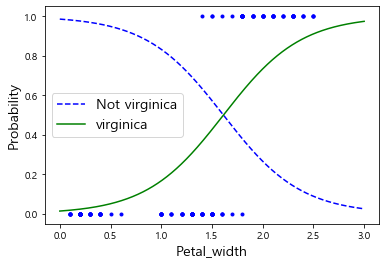

In [92]:
# 로지스틱 회귀를 시각화 시켜보기

# 데이터 불러오기
iris = datasets.load_iris()
X = iris.data[:,3:]  # petal width (cm)
y = (iris.target == 2) # virginica에 해당되면 true(1), 해당되지 않으면 false(0)을 출력

# 모델 생성 및 학습
logistic = LogisticRegression()
logistic.fit(X,y)

# 새로운 데이터 생성 --> 0부터 3까지의 점들 생성
X_new = np.linspace(0,3,1000).reshape(-1,1) # 앞의 X와 형태를 동일하게 만들어준다.
y_proba = logistic.predict_proba(X_new) # 예측 클래스를 확률로 보여준다. --> predict_proba

# 시각화 하기
plt.plot(X,y,'b.') # 색깔을 blue로 하고 표시를 ,으로 한다.
plt.plot(X_new,y_proba[:,0],'b--',label = 'Not virginica') # 클래스 0의 확률들을 그린다.
plt.plot(X_new,y_proba[:,1],'g-',label = 'virginica') # 클래스 1의 확률들을 그린다.

plt.xlabel('Petal_width',fontsize = 14)
plt.ylabel('Probability',fontsize = 14)
plt.legend(loc = 'best',fontsize = 14) # 범례 표시
plt.show()

##################

# 보통은 각 클래스의 확률 그래프가 겹치는 점을 기준을 임계값으로 정한다.
# 하지만, 재현율이나 정밀도의 중요도에 따라 임계값을 줄이거나 늘려 임계값을 바꿀 수 있다.

In [99]:
# 위의 모델은 default인 l2규제를 사용하였지만, 이번엔 l1규제를 사용해 보자
# l1규제를 사용하기 위해서는 solver 가  liblinear 또는 saga 이어야 한다.

# 임의의 데이터 생성
X_new1 = [[1.7],[1.5],[1.3],[2.0]] # X의 형태와 같게끔 만들어준다.

log_reg = LogisticRegression(solver='liblinear',penalty='l1') # l1규제를 사용하여 모델을 생성
log_reg.fit(X,y)

log_reg.predict(X_new1).astype(int) # true,fasle 값을 1과 0으로 변경 --> int형으로 변경

####################

# 주의할 점
# X_new1을 생성할때 리스트 안의 값들을 리스트로 만들지 않고, [1.7,1.5,1.3,2.0]형태로 만들면 오류가 발생하게 된다.

array([1, 0, 0, 1])

C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


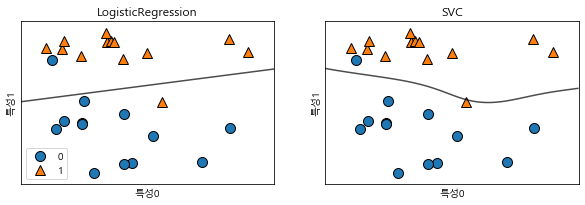

In [105]:
# 로지스틱 회귀분석과 svc(support vector classifier) 모델를 비교해 보자
# 앞에서 만들었던 forge 데이터를 이용해보자

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# 데이터 생성
X,y = mglearn.datasets.make_forge()

# 그래프 설정
fig,axes = plt.subplots(1,2,figsize=(10,3)) # 1행 2열의 그래프 생성

# svc와 로지스틱 모델 한번에 학습시키기
for model,ax in zip([LogisticRegression(),SVC()],axes):
    # 모델 학습
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps = 0.5,ax=ax,alpha=0.7) # 모델의 분류선 그리기
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax) # 각 데이터의 산점도 그리기
    
    ax.set_title('{}'.format(clf.__class__.__name__)) # 제목 작성
    ax.set_xlabel('특성0')
    ax.set_ylabel('특성1')
axes[0].legend() # 첫번째 그림에 범례 표시


##################

# 밑에 나온 그림대로만 보고 모델을 평가한다면 svc보단 로지스틱 모델이 새로운 데이터에 대해 더 잘 일반화 될것임을 알 수 있다.

* cancer data를 로지스틱 회귀 모델에 적용해보기

In [110]:
from sklearn.datasets import load_breast_cancer

# 데이터 생성
cancer = load_breast_cancer()

# 데이터 나누기 --> stratify --> 계층적 데이터 추출 (비율이 유지되도록 뽑는다.)
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify = cancer.target,random_state= 42)

# 파라미터 C를 변경하면서 모델점수 확인해보기

def get_c(C):
    
    # 모델 적용
    log_reg = LogisticRegression(max_iter=5000,C=C)
    # 모델 학습
    log_reg.fit(X_train,y_train)
    
    # 모델 점수 출력
    print('C : ',C)
    print('훈련 데이터 점수 : {:.2f}'.format(log_reg.score(X_train,y_train)))
    print('테스트 데이터 점수 : {:.2f}'.format(log_reg.score(X_test,y_test)))
    
# C 파라미터 지정
C = [1,100,0.01] 

# 모델 점수 출력하기
for i in C:
    get_c(i)
    
    
#######################

# 파라미터 C는 alpha의 역수 취급이기 때문에 C가 커지면 규제가 완화되고 C가 작아지면 규제가 강화된다.
# 분류의 문제의 경우는 정확도만 보고 모델성능을 평가하면 안된다. --> 양성클래스에 비해 음성클래스의 개수가 적다면
# 정확도는 높게 나올수도 있지만, 음성클래스는 제대로 예측하지 못하는 경우가 생길 수 있다.

C :  1
훈련 데이터 점수 : 0.95
테스트 데이터 점수 : 0.96
C :  100
훈련 데이터 점수 : 0.97
테스트 데이터 점수 : 0.97
C :  0.01
훈련 데이터 점수 : 0.93
테스트 데이터 점수 : 0.93


C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\174518\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [138]:
# l1규제와 l2규제 비교하기!!
# defaut값은 lbfgs ,  l1 --> 'liblinear'

def compare(solver,penalty):
    
    # 규제 C값들의 변화에 따른 모델 점수 
    for C,marker in zip([0.001,1,100],['o','^','v']):
        lr = LogisticRegression(solver=solver,C=C,penalty=penalty,max_iter=10000).fit(X_train,y_train)
        print('C = {:.3f}인 {} 로지스틱 회귀의 훈련 정확도 : {:.3f}'.format(C,penalty,lr.score(X_train,y_train)))
        print('C = {:.3f}인 {} 로지스틱 회귀의 테스트 정확도 : {:.3f}'.format(C,penalty,lr.score(X_test,y_test)))
        print('사용한 특성의 개수 : {} 개'.format(np.sum(lr.coef_ != 0)))
        plt.plot(lr.coef_.T,marker,label='C = {:.3f}'.format(C))        
        
    plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation = 90) # x축의 데이터 이름 설정
    xlims = plt.xlim()
    plt.hlines(0,xlims[0],xlims[1]) # 수평선 그리기
    plt.xlim(xlims) # x축 범위 지정
    plt.ylim(-5,5) # y축 범위 지정
    plt.legend(loc=3) # 범례 표시
    
    plt.xlabel('특성')
    plt.ylabel('계수 크기')

C = 0.001인 l1 로지스틱 회귀의 훈련 정확도 : 0.913
C = 0.001인 l1 로지스틱 회귀의 테스트 정확도 : 0.923
사용한 특성의 개수 : 3 개
C = 1.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.960
C = 1.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.958
사용한 특성의 개수 : 10 개
C = 100.000인 l1 로지스틱 회귀의 훈련 정확도 : 0.986
C = 100.000인 l1 로지스틱 회귀의 테스트 정확도 : 0.979
사용한 특성의 개수 : 23 개


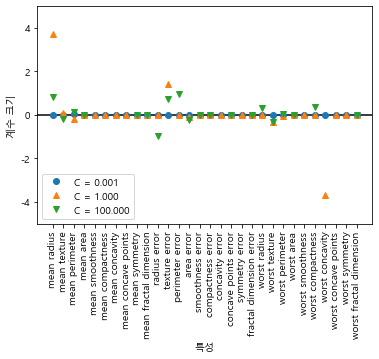

In [139]:
# l1규제 로지스틱 회귀의 정확도와 시각화
compare('liblinear','l1')

################
# C가 커질수록 규제의 영향이 줄어든다. ---> 계수의 크기가 커진다.

C = 0.001인 l2 로지스틱 회귀의 훈련 정확도 : 0.953
C = 0.001인 l2 로지스틱 회귀의 테스트 정확도 : 0.944
사용한 특성의 개수 : 30 개
C = 1.000인 l2 로지스틱 회귀의 훈련 정확도 : 0.958
C = 1.000인 l2 로지스틱 회귀의 테스트 정확도 : 0.958
사용한 특성의 개수 : 30 개
C = 100.000인 l2 로지스틱 회귀의 훈련 정확도 : 0.984
C = 100.000인 l2 로지스틱 회귀의 테스트 정확도 : 0.965
사용한 특성의 개수 : 30 개


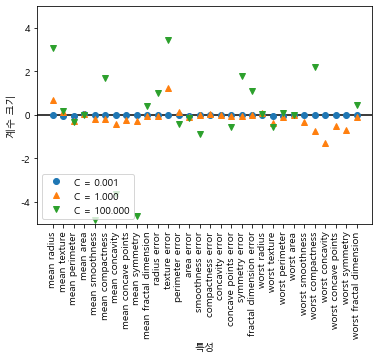

In [140]:
# l2규제 로지스틱 회귀의 정확도와 시각화
compare('lbfgs','l2')

########################
# l2규제의 경우는 계수가 0이 되지는 않고 0에 가깝게 되기 때문에 특성의 개수는 줄어들지 않는다.

* 분류 문제의 경우에는 정확도만 가지고는 모델의 성능이 좋은지 나쁜지 단언할 수 없다.
* 분류 문제에서는 오차행렬, 정밀도, 재현율, f1 score, roc곡선과 같은 여러 평가를 통해 종합적으로 모델을 평가해야 한다.